<a href="https://colab.research.google.com/github/JorgeArturo/ai_machine_learning_for_codes/blob/main/Chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Import Libraries
import tensorflow as tf
import tensorflow_datasets as tfds #Dataset API
import tensorflow.keras.optimizers.experimental
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt #Data visualization
import os #Manipulate Files
from PIL import Image #Manipulate Images

import warnings
warnings.filterwarnings('ignore') #ignores warnings

#Make sure Tensorflow is version 2.0 or higher
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.12.0


In [5]:
#Makes Folders to store images
os.makedirs('Data', exist_ok=True)
os.makedirs('Data/Train/Horses', exist_ok=True)
os.makedirs('Data/Train/Humans', exist_ok=True)
os.makedirs('Data/Test/Horses', exist_ok=True)
os.makedirs('Data/Test/Humans', exist_ok=True)

In [6]:
base_path = os.getcwd()
horse_counter = 0
human_counter = 0
#The below code will save the dataset images into the folders created above
#Note: This step is not required when using Tensorflow datasets but will be required when
# using datasets that are in the wild or possibly on Kaggle
#see horse or humans doc here ->https://www.tensorflow.org/datasets/catalog/horses_or_humans
for i, dataset in enumerate(tfds.load('horses_or_humans', split=['train', 'test'])):
    if i==0: #training set
        set_path = os.path.join(base_path, 'Data/Train')
    else: #test set
        set_path = os.path.join(base_path, 'Data/Test')

    for row in list(dataset):
        im = Image.fromarray(row['image'].numpy())
        if row['label'] == 0: #0 is horse and 1 is human
            class_path = os.path.join(set_path, 'Horses')
            file_path = os.path.join(class_path, "horse_{}.jpeg".format(horse_counter))
            horse_counter += 1
        elif row['label'] == 1: #0 is horse and 1 is human
            class_path = os.path.join(set_path, 'Humans')
            file_path = os.path.join(class_path, "human_{}.jpeg".format(horse_counter))
            human_counter += 1
        im.save(file_path) #saves the image in the proper folder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteQHU5DY/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteQHU5DY/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [7]:
print('Number of Horse Images in the Training Set:', len(os.listdir('Data/Train/Horses')))
print('Number of Human Images in the Training Set:', len(os.listdir('Data/Train/Humans')))
print('\n')
print('Number of Horse Images in the Testing Set:', len(os.listdir('Data/Test/Horses')))
print('Number of Human Images in the Testing Set:', len(os.listdir('Data/Test/Humans')))

Number of Horse Images in the Training Set: 500
Number of Human Images in the Training Set: 259


Number of Horse Images in the Testing Set: 128
Number of Human Images in the Testing Set: 66


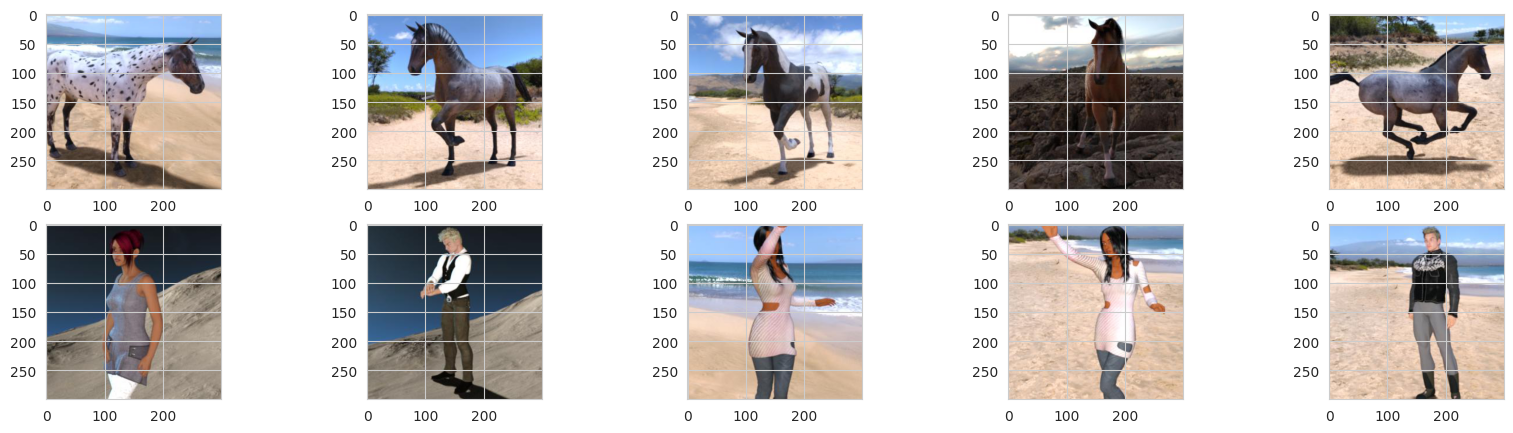

In [8]:
#Print Sample Images
horse_imgs = []
human_imgs = []

for i in range(5):
    horse_im = Image.open(os.path.join('Data/Train/Horses', os.listdir('Data/Train/Horses')[i]))
    human_im = Image.open(os.path.join('Data/Train/Humans', os.listdir('Data/Train/Humans')[i]))
    horse_imgs.append(horse_im)
    human_imgs.append(human_im)


plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        if i == 0:
            axs[i, j].imshow(horse_imgs[j])
        else:
            axs[i, j].imshow(human_imgs[j])
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
  "Data/Train",
  target_size=(300, 300),
  class_mode='binary'
)

Found 759 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
input_shape=(300, 300, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:


model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
metrics=['accuracy'])

In [18]:
history = model.fit_generator(
  train_generator,
  epochs=15
)

Epoch 1/15
24/24 [==============================] - 16s 168ms/step - loss: 0.6906 - accuracy: 0.6482
Epoch 2/15
24/24 [==============================] - 3s 131ms/step - loss: 0.5116 - accuracy: 0.7945
Epoch 3/15
24/24 [==============================] - 4s 159ms/step - loss: 0.2864 - accuracy: 0.9209
Epoch 4/15
24/24 [==============================] - 3s 123ms/step - loss: 0.2088 - accuracy: 0.9302
Epoch 5/15
24/24 [==============================] - 3s 131ms/step - loss: 0.0928 - accuracy: 0.9684
Epoch 6/15
24/24 [==============================] - 3s 132ms/step - loss: 0.1659 - accuracy: 0.9618
Epoch 7/15
24/24 [==============================] - 3s 135ms/step - loss: 0.3054 - accuracy: 0.9473
Epoch 8/15
24/24 [==============================] - 3s 123ms/step - loss: 0.0222 - accuracy: 0.9947
Epoch 9/15
24/24 [==============================] - 4s 164ms/step - loss: 0.0536 - accuracy: 0.9776
Epoch 10/15
24/24 [==============================] - 3s 132ms/step - loss: 0.0551 - accuracy: 0.980